In [11]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Question1

In [28]:
tesla = yf.Ticker("TSLA")
tesla_share_price = tesla.history(period="max")
tesla_share_price.reset_index(inplace=True)

tesla_share_price.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question2

In [15]:
tsla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [25]:
data  = requests.get(tsla_url).text
soup = BeautifulSoup(data, 'html.parser')
tesla_data = soup.find_all("tbody")[1]
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_data.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

tesla_revenue.head(5)

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [27]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


Question3

In [22]:
gme = yf.Ticker("GME")
gme_share_price = gme.history(period="max")
gme_share_price.reset_index(inplace=True)

gme_share_price.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question4

In [29]:
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [30]:
data  = requests.get(gme_url).text
soup = BeautifulSoup(data, "html.parser")
gme_data = soup.find_all("tbody")[1]
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_data.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)


gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"")
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.head(5)

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [31]:
gme_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


Question5

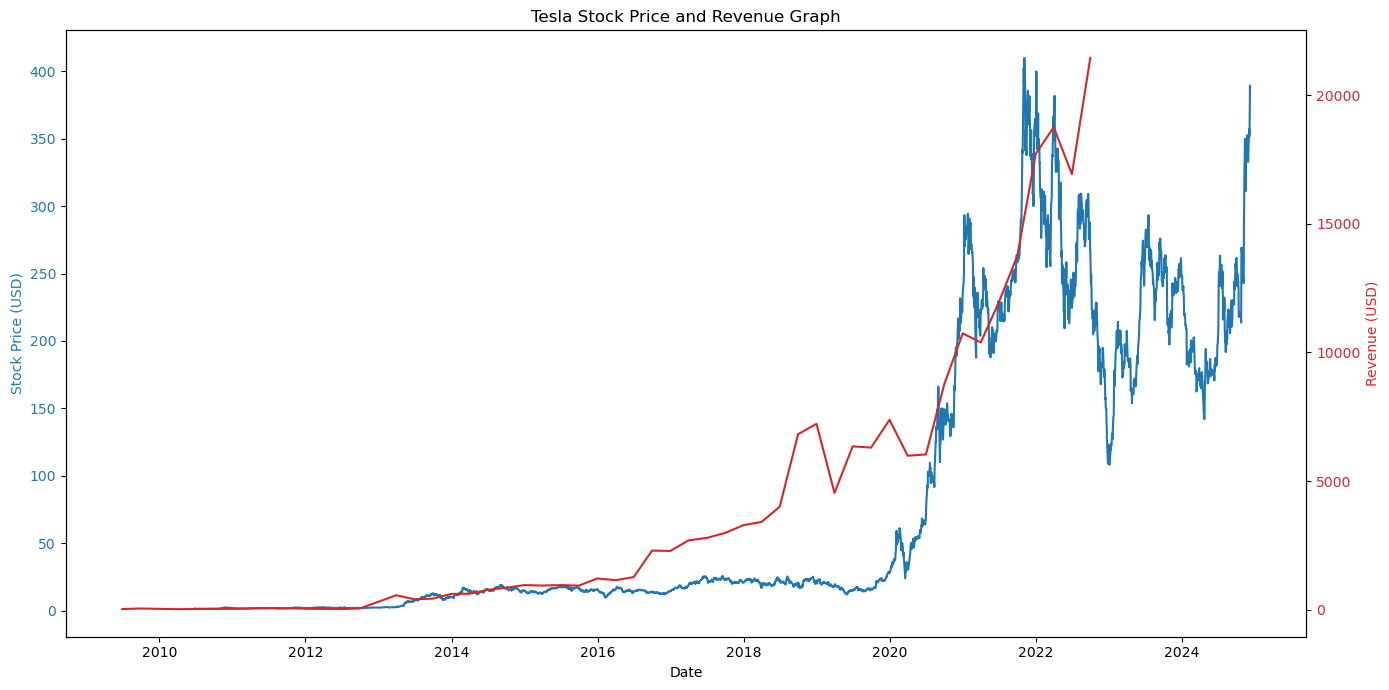

In [38]:
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"], errors='coerce')
tesla_revenue = tesla_revenue.dropna(subset=["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({',': '', '\$': ''}, regex=True).astype(float)
tesla_share_price.rename(columns={"Close": "Price"}, inplace=True)

def make_graph(share_price, revenue, title):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.plot(share_price["Date"], share_price["Price"], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue (USD)', color='tab:red')
    ax2.plot(revenue["Date"], revenue["Revenue"], color='tab:red', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(title)
    fig.tight_layout()
    plt.show()

make_graph(tesla_share_price, tesla_revenue, "Tesla Stock Price and Revenue Graph")

Question6

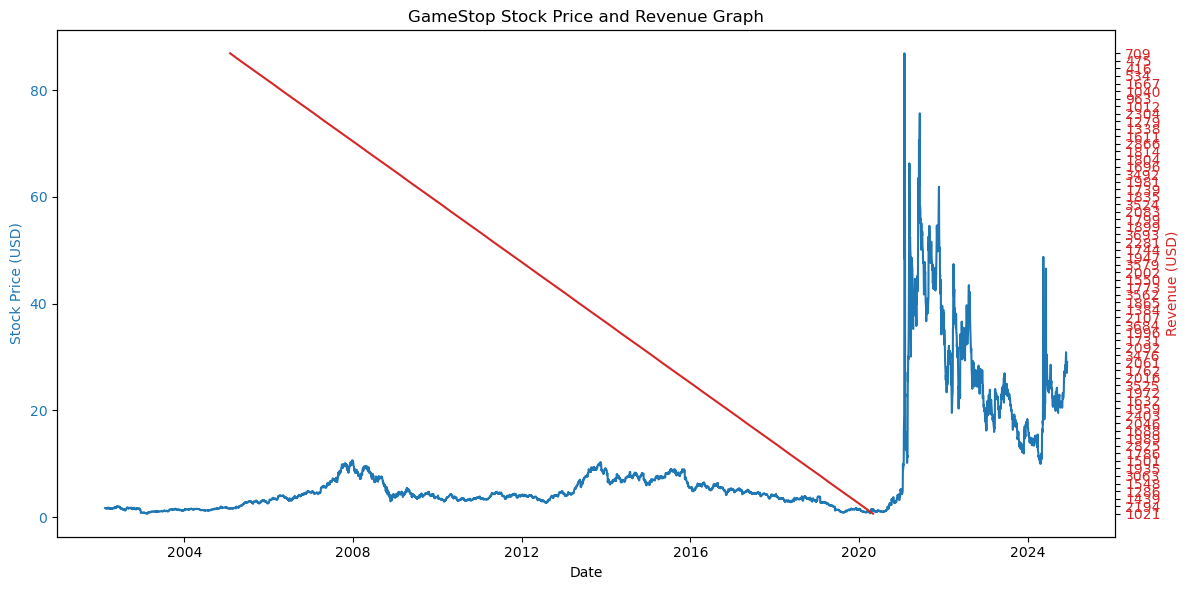

In [46]:
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], errors='coerce')

def make_graph(share_price, revenue, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.plot(share_price["Date"], share_price["Price"], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue (USD)', color='tab:red')
    ax2.plot(revenue["Date"], revenue["Revenue"], color='tab:red', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(title)
    fig.tight_layout()
    plt.show()

make_graph(gme_share_price, gme_revenue, "GameStop Stock Price and Revenue Graph")